### Sumário

- Introdução
- Definições do sinal e da função de janelamento
- Efeito do janelamento na DFT do sinal
- DFT - Variando o tamanho do sinal, mas não o da janela
- DFT - Variando o tamanho da janela
- Outros tipos de janela

### Introdução

Neste tópico vamos falar do efeito de janelamento do sinal no cálculo da DFT e como a ideia de janela pode nos ajudar a entender o espectro calculado pela DFT em relação ao espéctro esperado dado pela FT.

Para entender um pouco mais sobre as diferenças entre FT e DTF, ver o notebook FT, DTFT e DFT.



### Definições do sinal e da função de janelamento

Para comecar a nossa discussão vamos analisar separadamente dois sinais, o primero é sinal de interesse o qual queremos calcular o espectro, já o segundo é o sinal de janelamento, representado pela função rect.

$y_1(t) = sin(2\pi8t) + sin(2\pi5t)$

$y_2(t) = rect(\tau, t)$, onde $y_2 = 1$ se $|t| <= \tau$ e 0 caso contrário


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_sin(freq1, freq2, tfinal, Ts):
    t = np.arange(-tfinal/2, tfinal/2, Ts)
    y_sin = np.sin(2*np.pi*freq1*t) + np.sin(2*np.pi*freq2*t)
    return y_sin, t

In [3]:
def get_rect(tau, tfinal, Ts):
    t = np.arange(-tfinal/2, tfinal/2, Ts)
    rect = np.ones(len(t))
    rect[-(int(0.5*len(t))-int(0.5*tau/Ts)):] = 0
    rect[:(int(0.5*len(t))-int(0.5*tau/Ts))] = 0
    return rect, t

In [4]:
tfinal = 2
freq1 = 8
freq2 = 5
Fs = 1000
Ts = 1/Fs
tau = 1

y_sin, t = get_sin(freq1, freq2, tfinal, Ts)
rect, t = get_rect(tau, tfinal, Ts)
y_sin_rect, trect = get_sin(freq1, freq2, tau, Ts)

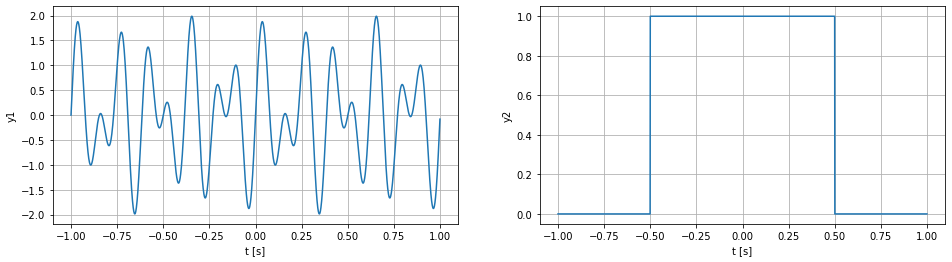

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].plot(t, y_sin)
axs[0].set_ylabel("y1")
axs[0].set_xlabel("t [s]")
axs[0].grid()
axs[1].plot(t, rect)
axs[1].set_ylabel("y2")
axs[1].set_xlabel("t [s]")
axs[1].grid()


Calculando a FT dos sinais temos:

$Y_1(f) = \delta(5) + \delta(7) +\delta(-5) +\delta(-7)$ 

e

$Y_2(f) = sinc(f)$

Vamos ver graficamente a forma das transformadas

*estamos desconsiderando constantes que podemos multiplicar essas funções.

In [6]:
freq = np.arange(-Fs/2, Fs/2, 0.05)

In [7]:
rect_spec = np.abs(np.sinc(tau*freq))

In [8]:
y_sin_spec = np.zeros(len(freq))
idx = np.isclose(freq, freq1) | np.isclose(freq, -freq1) | np.isclose(freq, freq2) | np.isclose(freq, -freq2)
y_sin_spec[idx] = 1

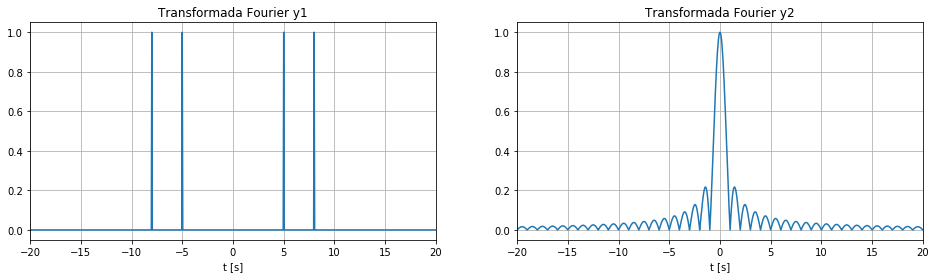

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].plot(freq, y_sin_spec)
axs[0].set_title("Transformada Fourier y1")
axs[0].set_xlabel("t [s]")
axs[0].set_xlim([-20, 20])
axs[0].grid()
axs[1].plot(freq, rect_spec)
axs[1].set_xlim([-20, 20])
axs[1].set_title("Transformada Fourier y2")
axs[1].set_xlabel("t [s]")
axs[1].grid()


### Efeito do janelamento na DFT do sinal

Já para o cálculo da DFT estamos sempre trabalhando com sinais discretos e limitados em tempo, a consequência disso é que nosso sinal $y_1$ não é mais definido no interalo de tempo $(-\infty, \infty)$ mas somente no intervalo para o qual foi amostrado. Podemos representar esse novo sinal no domínio do tempo pela seguinte equação:

$y_1'(t) = [sin(2\pi 5t) + sin(2\pi 10t)]rect(\tau t)$

Portanto o espectro calculado pela DFT é na verdade o espectro da função $y_1'(t)$ e não o da função $y_1(t)$.

Para calcular esse espectro vamos relembrar a seguinte propriedade da transformada de fourier.

$FT\{y_1(t)y_2(t)\} = FT\{y_1(t)\}*FT\{y_2(t)\}$

Ou seja, a FT do produto de duas funções é dada pela convolução da FT das funções.

Vermos então verificar isso com numpy.


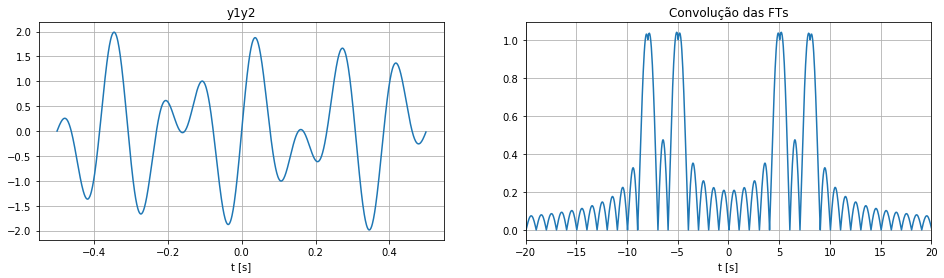

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].plot(trect, y_sin_rect)
axs[0].set_title("y1y2")
axs[0].set_xlabel("t [s]")
axs[0].grid()
axs[1].plot(freq, np.convolve(y_sin_spec, rect_spec, 'same'))
axs[1].set_xlim([-20, 20])
axs[1].set_title("Convolução das FTs")
axs[1].set_xlabel("t [s]")
axs[1].grid()

### DFT - Variando o tamanho do sinal, mas não o da janela

Agora vamos calcular a DFT do sinal $y_1'(t)$ e para diferentes tamanho do sinal amostrado, porém mantendo o valor de $\tau$. Isto equivale a adicionar zeros ao sinal até que um certo número de amostras sejam atingido.

In [11]:
N1 = len(y_sin)//2
y_sin_spec_1 = np.abs(np.fft.fft(y_sin_rect, n=N1))
freq_1 = np.fft.fftfreq(N1)*Fs

In [12]:
N2 = 2*len(y_sin)
y_sin_spec_2 = np.abs(np.fft.fft(y_sin_rect, n=N2))
y_sin_spec_2 /= np.max(y_sin_spec_2) 
freq_2 = np.fft.fftfreq(N2)*Fs

In [13]:
N3 = 10*len(y_sin)
y_sin_spec_3 = np.abs(np.fft.fft(y_sin_rect, n=N3))
y_sin_spec_3 /= np.max(y_sin_spec_3) 
freq_3 = np.fft.fftfreq(N3)*Fs

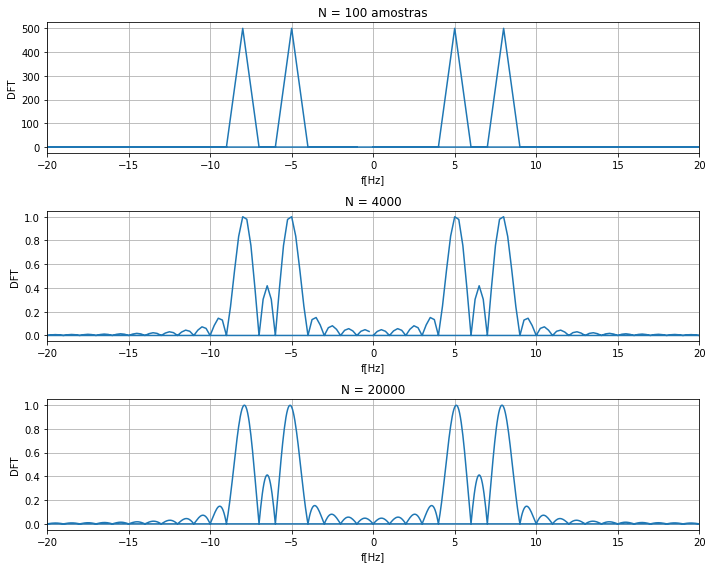

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].plot(freq_1, y_sin_spec_1)
axs[0].set_title("N = 100 amostras")
axs[0].set_ylabel("DFT")
axs[0].set_xlabel("f[Hz]")
axs[0].set_xlim([-20, 20])
axs[0].grid()

axs[1].plot(freq_2, y_sin_spec_2)
axs[1].set_title("N = 4000")
axs[1].set_ylabel("DFT")
axs[1].set_xlabel("f[Hz]")
axs[1].set_xlim([-20, 20])
axs[1].grid()

axs[2].plot(freq_3, y_sin_spec_3)
axs[2].set_title("N = 20000")
axs[2].set_ylabel("DFT")
axs[2].set_xlabel("f[Hz]")
axs[2].set_xlim([-20, 20])
axs[2].grid()


plt.tight_layout()


O aumento do tempo de amostragem sem o aumento da janela tem o efeito de aumentar o número de pontos na qual a FT é amostrada, apesar de termos uma maior discretização do eixo da frequência isso não aumenta de fato a resolução espectral, pois os lóbulos formados em torno das frequências do sinal não mudam de tamanho.

Vamos agora alterar o parâmetro $\tau$ e manter o tamanho da janela igual.

### DFT - Variando o tamanho da janela

In [15]:
tfinal = 10
Fs = 1000
Ts = 1/Fs
tau1 = 2
tau2 = 4
tau3 = 6

y_sin, t = get_sin(freq1, freq2, tfinal, Ts)
rect_tau1, t = get_rect(tau1, tfinal, Ts)
rect_tau2, t = get_rect(tau2, tfinal, Ts)
rect_tau3, t = get_rect(tau3, tfinal, Ts)

y_sin_tau1 = y_sin*rect_tau1
y_sin_tau2 = y_sin*rect_tau2
y_sin_tau3 = y_sin*rect_tau3

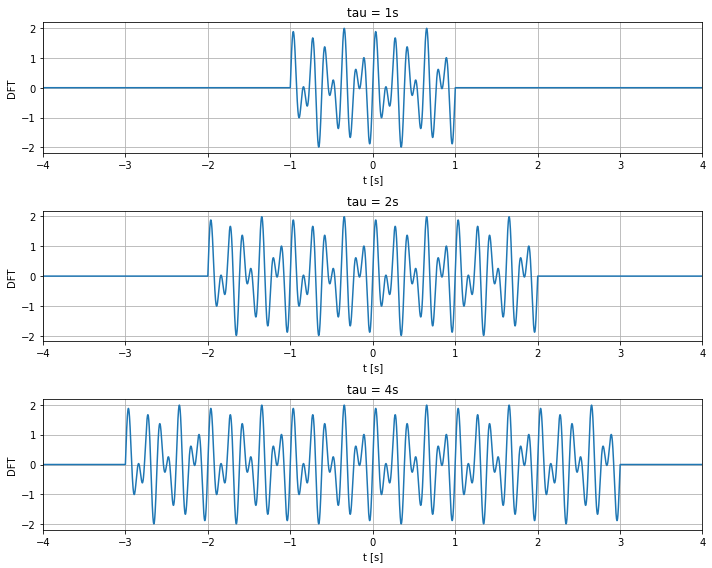

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].plot(t, y_sin_tau1)
axs[0].set_title("tau = 1s")
axs[0].set_ylabel("DFT")
axs[0].set_xlabel("t [s]")
axs[0].set_xlim([-4, 4])
axs[0].grid()

axs[1].plot(t, y_sin_tau2)
axs[1].set_title("tau = 2s")
axs[1].set_ylabel("DFT")
axs[1].set_xlabel("t [s]")
axs[1].set_xlim([-4, 4])
axs[1].grid()

axs[2].plot(t, y_sin_tau3)
axs[2].set_title("tau = 4s")
axs[2].set_ylabel("DFT")
axs[2].set_xlabel("t [s]")
axs[2].set_xlim([-4, 4])
axs[2].grid()


plt.tight_layout()


Vamos ver o que acontece com a DFT de cada um desses sinais.

In [17]:
N = len(y_sin)//2
freq = np.fft.fftfreq(N)*Fs

y_sin_spec_1 = np.abs(np.fft.fft(y_sin_tau1, n=N))
y_sin_spec_2 = np.abs(np.fft.fft(y_sin_tau2, n=N))
y_sin_spec_3 = np.abs(np.fft.fft(y_sin_tau3, n=N))

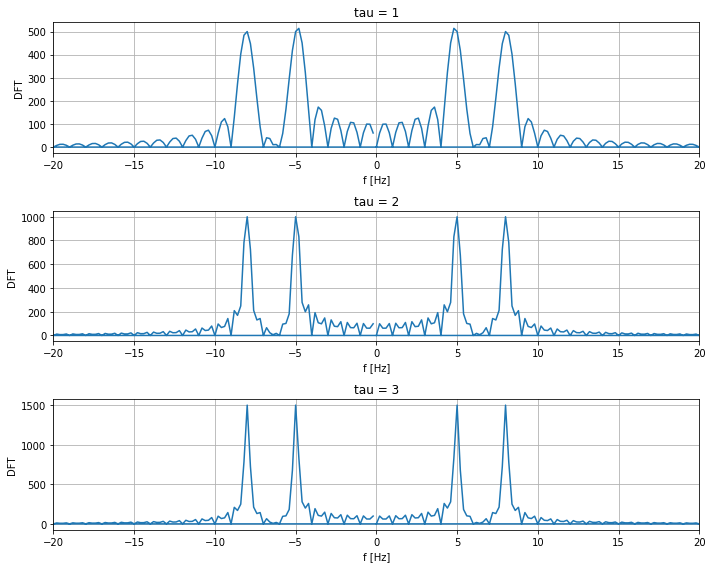

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].plot(freq, y_sin_spec_1)
axs[0].set_title("tau = 1")
axs[0].set_ylabel("DFT")
axs[0].set_xlabel("f [Hz]")
axs[0].set_xlim([-20, 20])
axs[0].grid()

axs[1].plot(freq, y_sin_spec_2)
axs[1].set_title("tau = 2")
axs[1].set_ylabel("DFT")
axs[1].set_xlabel("f [Hz]")
axs[1].set_xlim([-20, 20])
axs[1].grid()

axs[2].plot(freq, y_sin_spec_3)
axs[2].set_title("tau = 3")
axs[2].set_ylabel("DFT")
axs[2].set_xlabel("f [Hz]")
axs[2].set_xlim([-20, 20])
axs[2].grid()


plt.tight_layout()


Como podemos ver nos gráficos acima, todos eles possuem a mesma discretização do eixo da frequência, porêm quanto maior o valor de $\tau$ menor é a largura do lóbulos formados em torno das frequencias do sinal e consequentemente podemos localizar as frequência do sinal com maior precisão.

Ao aumentar de fato o tamanho do sinal usarado estamos realmente melhorando a resolução espectral da DFT.

### Outros tipos de janela

Além da janela retangular usada neste exemplo é comum em processamento de sinais utilizar outros tipo janela cujo o espétro sera diferente de um função $sinc$. A escolha do tipo de janela nos permite ajustar o trade-off entre a a largura dos lóbulos formados em torno da frequência do sinal e a velocidade que seus ripples decaem. Alguns exemplos de janelas podem ser encontrados em:

https://en.wikipedia.org/wiki/Window_function

### Conclusão

Neste tópico discutimos:
- O efeito do janelamente na DFT de um sinal
- Que a DFT do sinal é FT do sinal janelado amostrada
- A relação entre resolução espectral com o tamanho da janela e o número de amostras
- Como podemos de fato melhorar a resolução espectral ao aumentar o tempo de amostragem do sinal